<h1><center>Laboratorio 5: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matias Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Ortiz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Roberto Barceló

### **Link de repositorio de GitHub:** `http://....`


## Reglas:

- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 243 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


<p align="center"><iframe width="560" height="315" src="https://www.youtube.com/embed/MW4d8_LLYp8?rel=0&amp;controls=0&amp;showinfo=0" frameborder="1" allowfullscreen></iframe></p>

# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

**Invoice:** Corresponde a una variable categórica, en ella está descrita la factura emitida. Esta puede ser el número de factura o una emisión de reembolso que se antepone con una C.
	
**StockCode:** Corresponde a una variable categórica que indica el código del producto que se está procesando en la venta.	

**Description:** Corresponde a una variable categórica tipo string, en la cual se entrega una descripción del producto.	

**Quantity:** Variable numérica que indica el numero de unidades facturadas del producto en la transacción.	

**InvoiceDate:** Una variable tipo fecha, correspondiente a la fecha y hora en la que se factura la transaccion	

**Price:** Variable numérica que indica el valor por el cuál se está emitiendo la factura de los productos (no valor unitario, sino total por id de producto por factura)	

**Customer ID:** Variable categórica, donde se detalla el ID asignado a un comprador en particular. Este ID es único por comprador.	

**Country:** Variable categórica cualitativa tipo string, donde se anota el país en donde se emite la factura. Denotando la tienda de origen para el retail.

In [3]:
df_retail = pd.read_pickle('/content/drive/MyDrive/MDS7202_LPCPCD/Lab 5/online_retail_II.pickle')
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [100]:
df_retail.loc[df_retail['Customer ID']==13085]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
74409,496166,79323W,WHITE CHERRY LIGHTS,8,2010-01-29 11:42:00,6.75,13085.0,United Kingdom
74410,496166,21137,BLACK RECORD COVER FRAME,8,2010-01-29 11:42:00,3.75,13085.0,United Kingdom
74411,496166,22041,"RECORD FRAME 7"" SINGLE SIZE",6,2010-01-29 11:42:00,2.55,13085.0,United Kingdom
74412,496166,40046A,RED DAISY PAPER LAMPSHADE,12,2010-01-29 11:42:00,1.25,13085.0,United Kingdom


## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

El análisis univariante corresponde a analizar de forma independiente cada variable. Aplicando métodos de caracterización estadísticas para comprender mejor su ingerencia en el problema. En el caso del análisis multivariable, tenemos que se explora la relacion entre las variables y como estas pueden afectar los resultados esperados en el modelamiento del problema.

Vemos beneficios claros de ambos métodos. Así podremos comprender mejor las variables relevantes, la existencia de datos faltantes y como el conjunto de datos define una descripción mas completa de estos mismos. Eliminando variables redundantes o que aportan poco al problema en cuestión.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [5]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns={"index": serie.name, serie.name: "Count"})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [6]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

Vemos que encontramos valores negativos en el precio y también valores 0, estos valores pueden corresponder a errores de tipeo o variables donde se emitió una factura tipo Cxxxx. Estas facturas no se consideran en el análisis posterior de los datos.

In [7]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

Observamos un problema similar al caso anterior, vemos que existen grandes cantidades negativas en las facturas. Nuevamente este tipo de valores no tienen sentido. Finalmente vemos que se hace necesario realizar una limpieza de los datos disponibles.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [8]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df.corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

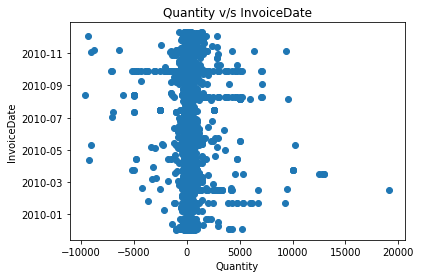

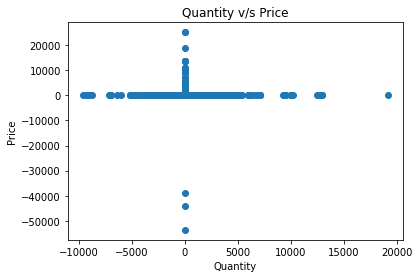

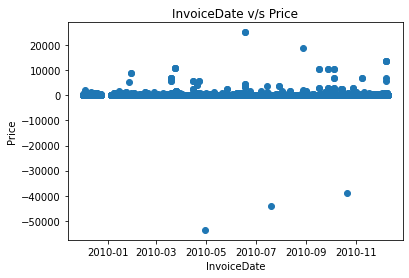

## Correlation:

## Missing Matrix:

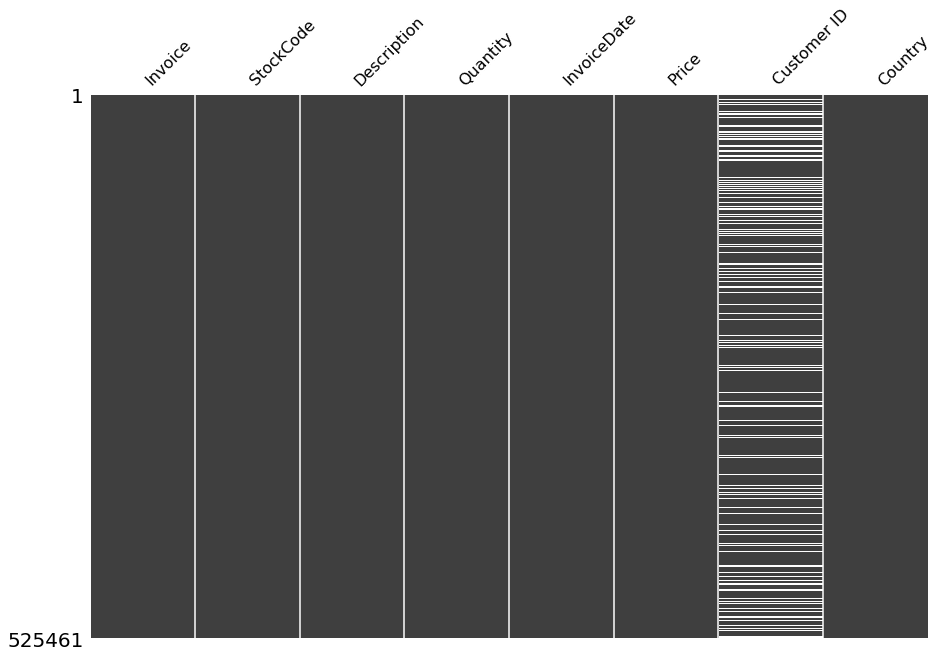

In [9]:
profile_df(df_retail)

Vemos que existe poca correlacion entre la cantidad vendida y los ingresos. Vemos que por fechas si existen peaks de cantidades mas altas vendidas y de mayor cantidad de ingresos percibidas.

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

Principalmente se eliminaron los outliers. Ahora podemos ver que la disptribución en la variable precios, que pertenece a los ingresos, se encunetra bastante concentrada en los primeros 3 cuartiles. donde existen muchas instacias de estos eventos. Con pocos ingresos muy cerca del máximo. el cuál puede ser tratado como outlier.

En términos de la variable Quantity, vemos un comportamiento similar. En donde las variables se encuentran fuertemente concentradas en los primeros 3 cuartiles. Donde los outliers son pocas instancias fuera de estos eventos mas frecuentes.

In [10]:
#Código Aquí
# se debe eliminar filas con variables negativas en las ventas
def elim_neg(df,columna):
  'funcion que recibe un dataframe y una columna y retorna un dataframe en donde esa columna solo tiene valores mayores a 0 (caso especial precio y cantidad)'
  df_limpio = df[df[columna]>0]
  return df_limpio

In [22]:
df_clean = elim_neg(df_retail,'Price')
df_clean = elim_neg(df_clean,'Quantity')

In [23]:
df_clean.loc[(df_clean['Quantity']<=0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [49]:
df_clean.loc[df_clean['Description']=='Manual']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2697,489609,M,Manual,1,2009-12-01 14:50:00,4.00,NaN,United Kingdom
11310,490300,M,Manual,1,2009-12-04 14:19:00,0.85,12970.0,United Kingdom
11311,490300,M,Manual,1,2009-12-04 14:19:00,0.21,12970.0,United Kingdom
17386,490760,M,Manual,1,2009-12-08 09:49:00,10.00,14295.0,United Kingdom
17887,490881,M,Manual,1,2009-12-08 12:58:00,10.00,16210.0,United Kingdom
...,...,...,...,...,...,...,...,...
517330,537534,M,Manual,1,2010-12-07 11:48:00,924.59,NaN,United Kingdom
521074,537800,M,Manual,12,2010-12-08 13:08:00,0.19,12748.0,United Kingdom
521122,537804,M,Manual,12,2010-12-08 13:17:00,2.95,12748.0,United Kingdom
521124,537804,M,Manual,12,2010-12-08 13:17:00,0.19,12748.0,United Kingdom


Reiteramos los test anteriores.

Análisis univariado

In [25]:
profile_serie(df_clean['Price'])

## Price Profile

Type                            float64
Number of observations         511566.0
Mean                           4.252563
Std                           63.664629
Min                               0.001
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                       61551.915238
Skew                           210.3689
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   510710
Duplicate rows (%)              99.83 %
Total size in memory      8185056 bytes
dtype: object

In [26]:
profile_serie(df_clean['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         511566.0
Mean                           11.40015
Std                           86.761177
Min                                 1.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                       11849.646687
Skew                           88.67179
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   511425
Duplicate rows (%)              99.97 %
Total size in memory      8185056 bytes
dtype: object

Análisis multivariado

## Bivariant Analysis:

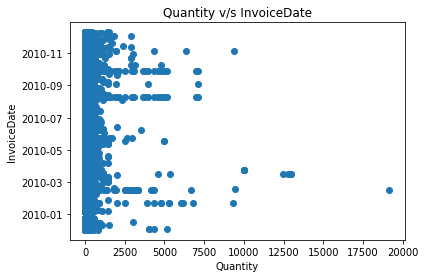

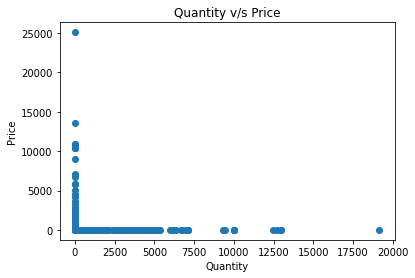

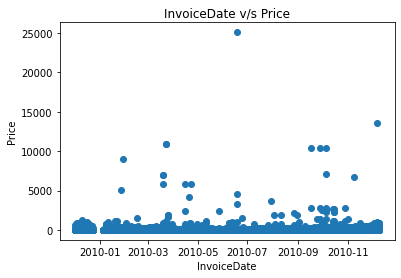

## Correlation:

## Missing Matrix:

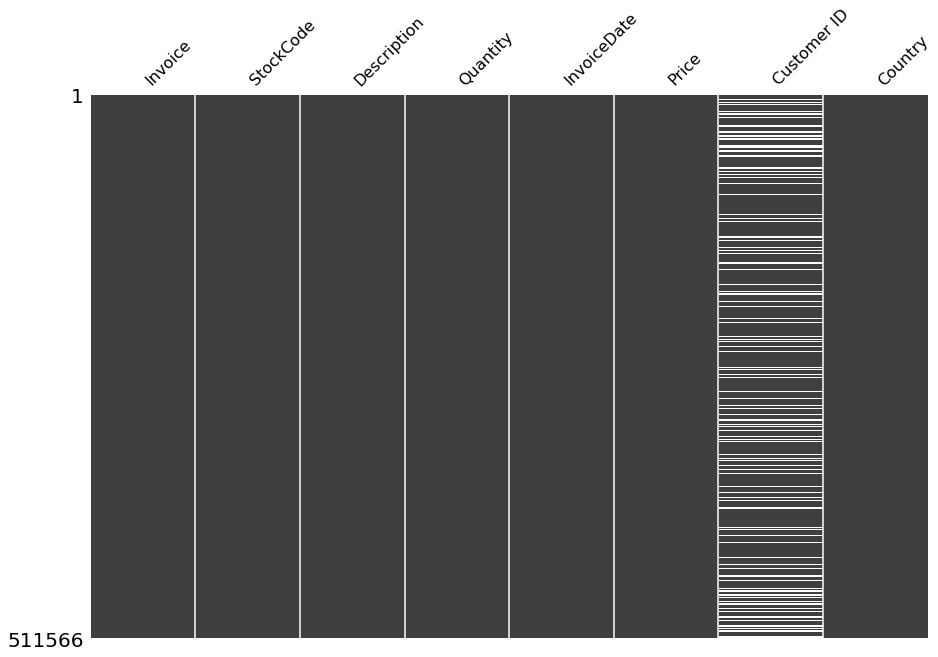

In [27]:
profile_df(df_clean)

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

Fuera de el producto WHITE HANGER HEART T-LIGHT HOLDER, no vemos que exista una correlación entre las ganancias y la cantidad vendida. Esto se debe principalmente a que el precio de los productos mas vendidas no suele ser el mas alto por unidad. Por lo que, independiente de si se venden muchas unidades, estas no taren grandes ganancias

In [63]:
# Código Aquí
df_grouped = df_clean.groupby(by='Description', as_index=False)['Description','Quantity','Price'].sum()
# top 30 valores de productos que venden mas unidades
df_unit = df_grouped.nlargest(30,'Quantity')
# top 30 valores de productos que generan mas ganancia
df_gan = df_grouped.nlargest(32,'Price')
#ploteamos las ganancias

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Gráfico de ganancias por productos

In [64]:
fig = px.bar(df_gan[2:], x='Description', y='Price')
fig.show()

Gráfico de unidades vendidas por producto

In [65]:
fig = px.bar(df_unit, x='Description', y='Quantity')
fig.show()

In [66]:
df_gan.head()

,Description,Quantity,Price
2514,Manual,2831,260897.18
1280,DOTCOM POSTAGE,730,116408.71
3329,REGENCY CAKESTAND 3 TIER,13698,29374.30
186,AMAZON FEE,2,20248.04
3124,POSTAGE,2310,20231.29


In [67]:
df_unit.head()

,Description,Quantity,Price
4349,WHITE HANGING HEART T-LIGHT HOLDER,58792,10640.38
4455,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55091,123.45
707,BROCADE RING PURSE,48374,56.28
2704,PACK OF 72 RETRO SPOT CAKE CASES,46755,967.14
269,ASSORTED COLOUR BIRD ORNAMENT,45348,2887.66


### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [92]:
def df_ventas(dataframe):
  # Código Aquí
  df_grouped = dataframe.groupby(pd.Grouper(key='InvoiceDate',freq='D'), as_index=True)['Quantity','Price'].sum()
  df_grouped['Date'] = df_grouped.index
  return df_grouped

Creamos un dataframe donde se agrupen los datos de ventas en cantidades y ganancias totales para cada día.

In [99]:
df_recalc = df_ventas(df_clean)
df_recalc.head(15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Quantity,Price,Date
InvoiceDate,,,
2009-12-01,26204,13979.67,2009-12-01
2009-12-02,31896,13201.65,2009-12-02
2009-12-03,49243,11145.50,2009-12-03
2009-12-04,21325,9512.81,2009-12-04
2009-12-05,5119,1443.26,2009-12-05
2009-12-06,11623,6264.55,2009-12-06
2009-12-07,18058,12625.22,2009-12-07
2009-12-08,23159,8575.06,2009-12-08
2009-12-09,17934,11191.67,2009-12-09


In [97]:
df_recalc.head(-5)

,Quantity,Price,Date
InvoiceDate,,,
2009-12-01,26204,13979.67,2009-12-01
2009-12-02,31896,13201.65,2009-12-02
2009-12-03,49243,11145.50,2009-12-03
2009-12-04,21325,9512.81,2009-12-04
2009-12-05,5119,1443.26,2009-12-05
...,...,...,...
2010-11-30,26592,7462.63,2010-11-30
2010-12-01,26919,12806.18,2010-12-01
2010-12-02,31329,6609.15,2010-12-02


In [94]:
def plot_ventas(df, x_axis, y_axis):
  fig = px.line(df_recalc, x=x_axis, y=y_axis)
  fig.show()

In [95]:
plot_ventas(df_recalc, 'Date', 'Quantity')

Vemnos algunas cosas interesantes en el gráfico de mas arriba. En primer lugar vemos que no se emiten facturas los sábados. Esto se puede deber al cierre de tiendas periodicamente o a un tema tributario. En segundo lugar, vemos que existen periódos en donde no se emiten facturas durante varios días. Estos son coincidentemente los mismos que periódos en los que hay vacaciones.

También se registran ciertos peaks en ventas sin aparente razón. Probablemente asociadas a promociones y periódos festivos no marcados en el calendario.

Fuera de eso, no hay un comportamiento marcado aparente para evidenciar las demandas a grandes rasgos.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>